# Data

The dataset was created using NOAA - Global Monitoring Laboratory's studies on greenhouse gases for nearly two decade

For More Detail:
https://gml.noaa.gov/ccgg/

the dataset is about monthly measuring the atmospheric distribution and trends of the main long-term drivers of climate change, carbon dioxide (CO2), methane (CH4), and nitrous oxide (N2O), as well as Sulfur hexafluoride (SF6).

**relative_temp** : relative temperature values according to reference temperature

**CO2**: Data are reported as a dry air mole fraction defined as the number of molecules of carbon dioxide divided by the number of all molecules in air, including CO2 itself, after water vapor has been removed. The mole fraction is expressed as parts per million (ppm). Example: 0.000400 is expressed as 400 ppm.

**CH4**: Methane is reported as a “dry air mole fraction”, defined as the number of molecules of methane divided by the total number of molecules in the sample, after water vapor has been removed. The mole fraction is expressed as nmol mol-1, abbreviated “ppb” (for parts per billion; 1 ppb indicates that one out of every billion molecules in an air sample is CH4).

**N2O**: Nitrous oxide is reported as a “dry air mole fraction”, defined as the number of molecules of nitrous oxide divided by the total number of molecules in the sample, after water vapor has been removed. The mole fraction is expressed as nmol mol-1, abbreviated “ppb” (for parts per billion; 1 ppb indicates that one out of every billion molecules in an air sample is N2O).

**SF6**: Sulfur hexafluoride is reported as a “dry air mole fraction”, defined as the number of molecules of sulfur hexafluoride divided by the total number of molecules in the sample, after water vapor has been removed. The mole fraction is expressed as pmol mol-1, abbreviated “ppt” (for parts per trillion; 1 ppt indicates that one out of every trillion molecules in an air sample is SF6).

![](greenhouse.jpg)


------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 

### Temperature Data

In [2]:
custom_date_parser = lambda x: datetime.strptime(x, "%Y%m")

df_temp = pd.read_csv("./raw_data/1880-2022.csv", parse_dates = ["Year"], date_parser=custom_date_parser, skiprows = 4)

In [3]:
df_temp.columns = ["date","relative_temp"]

In [4]:
df_temp.head()

,date,relative_temp
0,1880-01-01,-0.05
1,1880-02-01,-0.14
2,1880-03-01,-0.08
3,1880-04-01,-0.04
4,1880-05-01,-0.08


In [5]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1712 entries, 0 to 1711
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1712 non-null   datetime64[ns]
 1   relative_temp  1712 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 26.9 KB


In [6]:
df_temp.set_index(["date"], inplace = True)

In [7]:
df_temp.head()

,relative_temp
date,
1880-01-01,-0.05
1880-02-01,-0.14
1880-03-01,-0.08
1880-04-01,-0.04
1880-05-01,-0.08


In [8]:
df_temp.isnull().sum()

relative_temp    0
dtype: int64

------------

### CO2 data

In [9]:
df_co2 = pd.read_csv("./raw_data/co2_mm_gl.csv", parse_dates = {"date":["year","month"]}, skiprows = 55)

In [10]:
df_co2.drop(["decimal","average_unc","trend","trend_unc"],axis=1, inplace=True)

In [11]:
df_co2.columns = ["date","co2"]

In [12]:
df_co2.head()

,date,co2
0,1979-01-01,336.56
1,1979-02-01,337.29
2,1979-03-01,337.88
3,1979-04-01,338.32
4,1979-05-01,338.26


In [13]:
df_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    522 non-null    datetime64[ns]
 1   co2     522 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.3 KB


In [14]:
df_co2.set_index(["date"], inplace = True)

In [15]:
df_co2.head()

,co2
date,
1979-01-01,336.56
1979-02-01,337.29
1979-03-01,337.88
1979-04-01,338.32
1979-05-01,338.26


In [16]:
df_co2.isnull().sum()

co2    0
dtype: int64

------------

### CH4 Data

In [17]:
df_ch4 = pd.read_csv("./raw_data/ch4_mm_gl.txt", sep = r"\s+", skiprows = 65, header = None, 
                     names = ["year","month","decimal","average","average_unc","trend","trend_unc"],
                     parse_dates = {"date":["year","month"]})

* csv_read de parse kullanmadan date değişkeni atama

df_ch4['date'] = pd.to_datetime(df_ch4[['year', 'month']].assign(DAY=1))

* "date" i birinci kolon olarak atamak için

first_column = df_ch4.pop('date')

df_ch4.insert(0,"date",first_column)

In [18]:
df_ch4.drop(["decimal","average_unc","trend","trend_unc"],axis=1, inplace=True)

In [19]:
# bir değişkenin kolon ismini değiştirme

df_ch4.columns= ["date", "ch4"]

In [20]:
df_ch4.head()

,date,ch4
0,1983-07-01,1625.76
1,1983-08-01,1628.13
2,1983-09-01,1638.41
3,1983-10-01,1644.79
4,1983-11-01,1642.62


In [21]:
df_ch4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    467 non-null    datetime64[ns]
 1   ch4     467 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.4 KB


In [22]:
df_ch4.set_index(["date"], inplace = True)

In [23]:
df_ch4.head()

,ch4
date,
1983-07-01,1625.76
1983-08-01,1628.13
1983-09-01,1638.41
1983-10-01,1644.79
1983-11-01,1642.62


In [24]:
df_ch4.isnull().sum()

ch4    0
dtype: int64

---------

### N2O Data

In [25]:
df_n2o = pd.read_csv("./raw_data/n2o_mm_gl.txt", sep = r"\s+", skiprows = 65, header = None, 
                     names = ["year","month","decimal","average","average_unc","trend","trend_unc"],
                     parse_dates = {"date":["year","month"]})

In [26]:
df_n2o.drop(["decimal","average_unc","trend","trend_unc"],axis=1, inplace=True)

In [27]:
df_n2o.columns = ["date","n2o"]

In [28]:
df_n2o.head()

,date,n2o
0,2001-01-01,316.30
1,2001-02-01,316.31
2,2001-03-01,316.21
3,2001-04-01,316.12
4,2001-05-01,316.11


In [29]:
df_n2o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    257 non-null    datetime64[ns]
 1   n2o     257 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.1 KB


In [30]:
df_n2o.set_index(["date"], inplace = True)

In [31]:
df_n2o.head()

,n2o
date,
2001-01-01,316.30
2001-02-01,316.31
2001-03-01,316.21
2001-04-01,316.12
2001-05-01,316.11


In [32]:
df_n2o.isnull().sum()

n2o    0
dtype: int64

-----------------

### SF6 Data
* Monthly Trends in Globally-Averaged Atmospheric Sulfur Hexafluoride

In [33]:
df_sf6 = pd.read_csv("./raw_data/sf6_mm_gl.txt", sep=r"\s+", parse_dates = {"date":["year","month"]}, skiprows = 65,
                     names = ["year","month","decimal","average","average_unc","trend","trend_unc"],
                     header = None)

In [34]:
df_sf6.drop(["decimal","average_unc","trend","trend_unc"],axis=1, inplace=True)

In [35]:
df_sf6.columns = ["date","sf6"]

In [36]:
df_sf6.head()

,date,sf6
0,1997-07-01,4.00
1,1997-08-01,4.00
2,1997-09-01,4.02
3,1997-10-01,4.05
4,1997-11-01,4.08


In [37]:
df_sf6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    299 non-null    datetime64[ns]
 1   sf6     299 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.8 KB


In [38]:
df_sf6.set_index(["date"], inplace = True)

In [39]:
df_sf6.head()

,sf6
date,
1997-07-01,4.00
1997-08-01,4.00
1997-09-01,4.02
1997-10-01,4.05
1997-11-01,4.08


-----------------

## Merge the data

In [40]:
df_concat = pd.concat([df_temp, df_co2, df_ch4, df_n2o, df_sf6], axis =1)

In [41]:
df_concat

,relative_temp,co2,ch4,n2o,sf6
date,,,,,
1880-01-01,-0.05,NaN,NaN,NaN,NaN
1880-02-01,-0.14,NaN,NaN,NaN,NaN
1880-03-01,-0.08,NaN,NaN,NaN,NaN
1880-04-01,-0.04,NaN,NaN,NaN,NaN
1880-05-01,-0.08,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2022-04-01,0.84,418.48,1909.97,335.45,10.96
2022-05-01,0.77,418.52,1908.74,335.47,10.99
2022-06-01,0.88,417.42,NaN,NaN,NaN


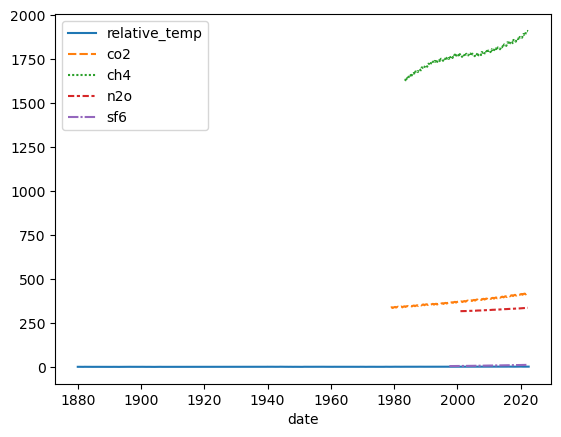

In [42]:
sns.lineplot(data = df_concat);

----------------

### Finding First and Last Mesurement Dates with Certain Number for all Features

In [43]:
print("Fisrt and Last Mesurement Dates")
for i in df_concat.columns:
    print(30*"-")
    print(i.upper())
    print(df_concat[i][df_concat[i].notnull()].take([0,-1]))

Fisrt and Last Mesurement Dates
------------------------------
RELATIVE_TEMP
date
1880-01-01   -0.05
2022-08-01    0.90
Name: relative_temp, dtype: float64
------------------------------
CO2
date
1979-01-01    336.56
2022-06-01    417.42
Name: co2, dtype: float64
------------------------------
CH4
date
1983-07-01    1625.76
2022-05-01    1908.74
Name: ch4, dtype: float64
------------------------------
N2O
date
2001-01-01    316.30
2022-05-01    335.47
Name: n2o, dtype: float64
------------------------------
SF6
date
1997-07-01     4.00
2022-05-01    10.99
Name: sf6, dtype: float64


In [44]:
# dateframe with all features having mesaurement at the same date

df_concat[df_concat.notnull()].dropna()

,relative_temp,co2,ch4,n2o,sf6
date,,,,,
2001-01-01,0.47,370.68,1772.86,316.30,4.69
2001-02-01,0.41,371.18,1772.50,316.31,4.71
2001-03-01,0.65,371.59,1773.63,316.21,4.73
2001-04-01,0.59,371.90,1773.84,316.12,4.75
2001-05-01,0.62,371.80,1770.73,316.11,4.76
...,...,...,...,...,...
2022-01-01,0.88,417.18,1908.15,335.26,10.85
2022-02-01,0.80,417.63,1908.11,335.34,10.88
2022-03-01,0.93,418.06,1909.28,335.39,10.92


In [45]:
df_value = df_concat[df_concat.notnull()].dropna()

<AxesSubplot:xlabel='date'>

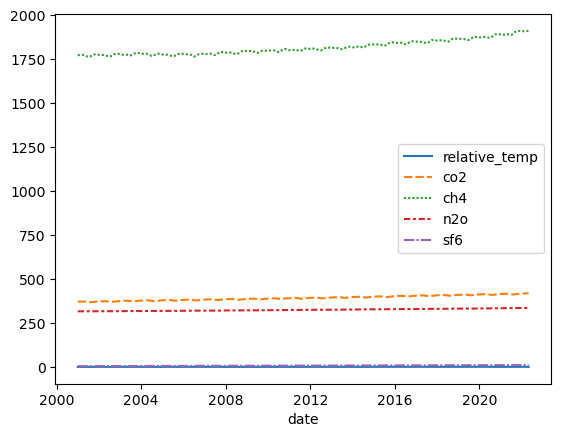

In [46]:
sns.lineplot(data = df_value)

In [47]:
df_value.to_csv("greenhouse_gases.csv")

--------------------

## Create Relative Difference Variables for each gas measurement

In [48]:
# to subtract the previous row from the current row in a pandas dataframe and apply it to every row

# percentage chanching
# df["relative_co2"] = round(df["co2"].pct_change()*100,2)

# normal chancing 
# df["relative_co2"] = round(df["co2"].diff(),2)

### get diff 

In [51]:
# percentage changing
df_value["relative_co2"] = round(df_value["co2"].diff(),2)
df_value["relative_ch4"] = round(df_value["ch4"].diff(),2)
df_value["relative_n2o"] = round(df_value["n2o"].diff(),2)
df_value["relative_sf6"] = round(df_value["sf6"].diff(),2)

### fill the firt row's Nan values with next row values after apply get diff

In [53]:
df=df_value.fillna(method='bfill')

------------

# Save as csv

In [54]:
df.to_csv("greenhouse_gases.csv")